### Student details

Student name: Bhagyalakshmy Saburaj

Student ID: 25275224


General rules:

1. Do not change anything in the given code unless you are requested to.

2. Install any external libraries that you might want to use within the notebook file with the !pip install command, so that your code can run without errors during autotests. This rule doesn't apply for numpy, pandas, matplotlib, and sklearn.

3. For any code you add, don't use again any of the predefined names for variables, functions, or classes that are already included in the template (i.e. no duplicate names).

# Task 1 - Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [39]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [40]:
class CustomPerceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### 1. Read the data
(provided - should be completed in previous E-tivity)

In [41]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

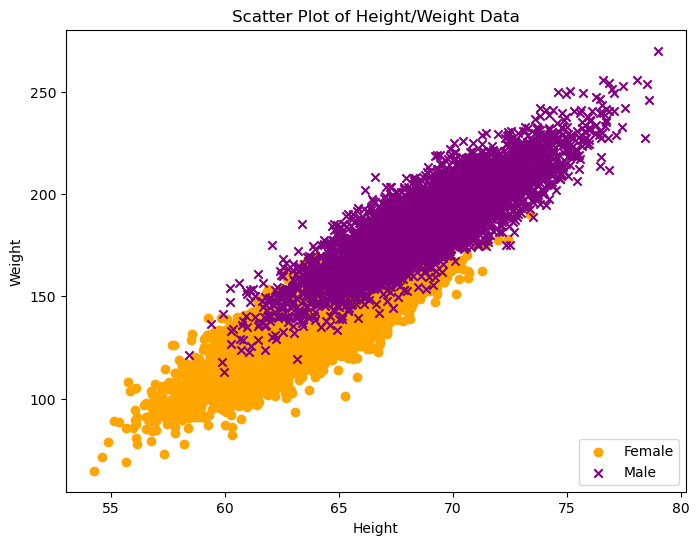

In [42]:
# Plot the data as a scatter plot
import matplotlib.pyplot as plt
# Your code here
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='orange', marker='o', label='Female')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='purple', marker='x', label='Male')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height/Weight Data')
plt.legend(loc='lower right')
plt.show()

### Train/Test Split
(provided - should be completed in previous E-tivity)

In [43]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # !!!DO NOT CHANGE THE NAMES OF THE SPLITS!!!

### 2. Train the algorithm (Task)

In [44]:
# Your code here
perceptron = CustomPerceptron(eta=0.01, epochs=50) # Initialize with default values
perceptron.train(X_train, y_train)# !!!DO NOT CHANGE THE NAME OF THE MODEL!!!

### 3. Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [45]:
################################
# Your code here
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = perceptron.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Perceptron Model Test Accuracy: {accuracy:.4f}')


Perceptron Model Test Accuracy: 0.8545


### Visualisations (Task)
4. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
5. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

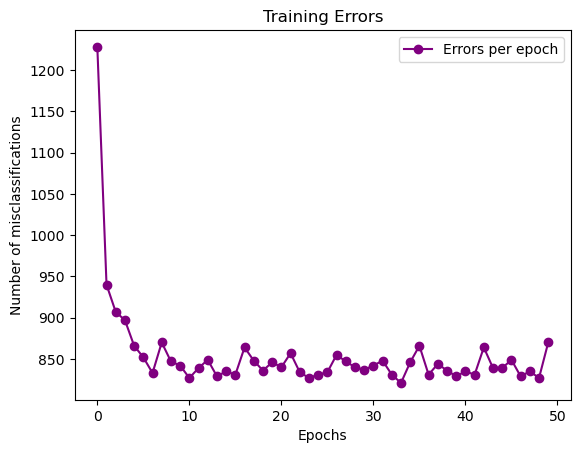

In [108]:
import matplotlib.pyplot as plt
import numpy as np

#Plot training errors
plt.plot(perceptron.errors_, 'o-', color='purple',label='Errors per epoch')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Training Errors')
plt.legend()
plt.show()




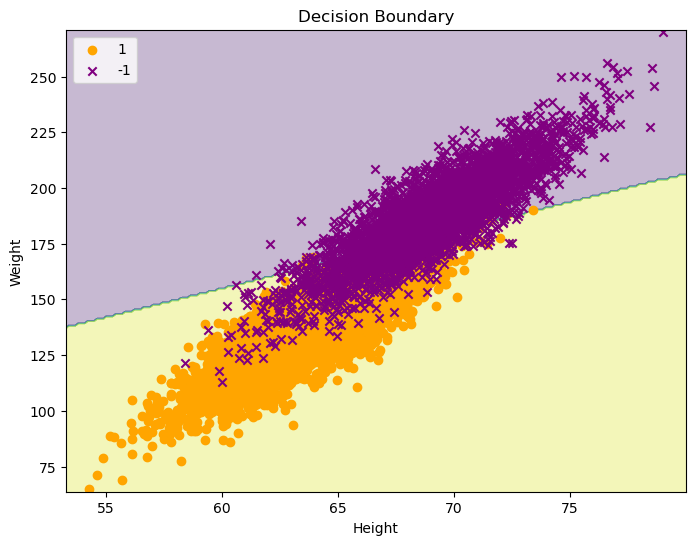

In [107]:
def plot_boundary(X, y, model, grid_points=200):  # reduce mesh size
    # mesh grid over feature space
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_points),
                         np.linspace(y_min, y_max, grid_points))

    # predict
    Z = np.array([model.predict(np.array([a, b])) for a, b in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # plot the decision boundary
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y==1,0], X[y==1,1], color='orange', marker='o', label='1')
    plt.scatter(X[y==-1,0], X[y==-1,1], color='purple', marker='x', label='-1')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

# Call the function with reduced grid points
plot_boundary(X_train, y_train, perceptron, grid_points=200)


### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?
During training, the weights of the perceptron are continuously adapted to reduce misclassification errors on the training data. Initially errors are larger, and during the learning process, the perceptron adjusts its decision boundary, decrementing the mistakes in classifications.

2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
Perceptron is not guaranteeing that the final epoch is with the globally best error; it merely converges to a weight vector that best separates the classes.
3.	Why can’t we get zero error with this data?
The perceptron can only find a linear decision boundary. When classes overlap in the feature space, no straight line can perfectly separate them, so some misclassifications are inevitable.

# Task 2 - Adaline

* Iris Data Data obtained from https://archive.ics.uci.edu/ml/datasets/iris


In [47]:
# import dependencies
import numpy as np

### Adaline class (provided)
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [48]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

<span style="color: red">We will use the Iris-setosa and Iris-versicolor classes. Use the whole dataset for training. Don't create a test set.</span>

In [49]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)#load the dataset

# setosa and versicolor
y = df.iloc[0:100, 4].values
y_iris = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X_iris = df.iloc[0:100, [0,2]].values

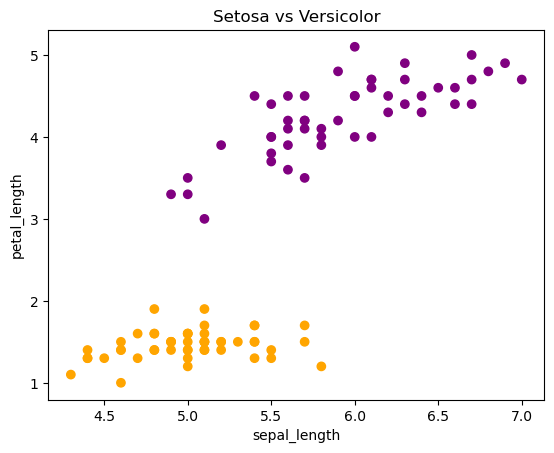

In [109]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# custom colormap
custom_cmap = ListedColormap(['orange', 'purple'])

# Plot scatter with custom colors
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap=custom_cmap)
plt.xlabel(df.columns[0])  # Sepal Length
plt.ylabel(df.columns[2])  # Petal Length
plt.title('Setosa vs Versicolor')
plt.show()


### Examine the impact of learning rate

1. Train the gradient descent algorithm with eta = 0.01, eta = 0.001, eta = 0.0001. Plot the cost as a function of epoch in each case. Note: it is useful to plot some on a log scale
2. Explain what is happening in each case?
3. How many epochs (approx) for convergence with eta = 0.0001?
4. Can you find a learning rate that converges quicker, but without overshoot?
5. The learning rate can be very sensitive, a very small change can lead to overshoot. For example, have a look at what happens between a learnign rate of 0.00045 and 0.0005, just a 5e-5 change

Please note that this is just about the simplest gradient descent implementation posssible. There are much more advanced algorithms that are typically used that improve robustness, avoid local minima, avoid overshoot and improve convergence times. So it's not all as "on a knife edge" as this example. But, in principle, picking a learning rate is still an important topic of machine learning.

In [102]:
# 1. Train the gradient descent algorithm with eta = 0.01, eta = 0.001, eta = 0.0001.
# Plot the cost as a function of epoch in each case. Note: it is useful to plot some on a log scale
################################

# !!!DO NOT CHANGE THE NAMES OF THE MODELS!!!
# eta = 0.01 (Likely to overshoot/diverge)
adaline_01 = AdalineGD(eta=0.01, epochs=50).train(X_iris, y_iris)

# eta = 0.001 (Likely to converge slowly)
adaline_001 = AdalineGD(eta=0.001, epochs=50).train(X_iris, y_iris)

# eta = 0.0001 (Likely to converge very slowly)
adaline_0001 = AdalineGD(eta=0.0001, epochs=50).train(X_iris, y_iris)

adaline_00045 = AdalineGD(eta=0.00045, epochs=50).train(X_iris, y_iris)


### Feature Scaling

A problem with features is that they can be on a different scale, and gradient descent can struggle with this. Feature scaling can reduce the sensitivity to learning rate, and can lead to faster convergence. One of the more common approaches to feature scaling is standardisation, given by:

\begin{equation}
\textbf{x}_{j,std} = \frac{\textbf{x}_j - \mu_j}{\sigma_j}
\end{equation}

where $\mu_j$ is the mean and $\sigma_j$ is the standard deviation of $\textbf{x}_j$. Note that we don't have a good definition for the subtraction of a vector and a scalar, but here by $\textbf{x}_j - \mu_j$ we mean the subtraction of $\mu_j$ from each element of $\textbf{x}_j$.


Ref: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

1. Implement feature scaling on the data, and retrain the algorithm
2. Print the residual cost in each iteration
3. Describe how it compares to before feature scaling
4. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

Hint: in this case, the training data was scaled, so your test data has to be scaled as well.

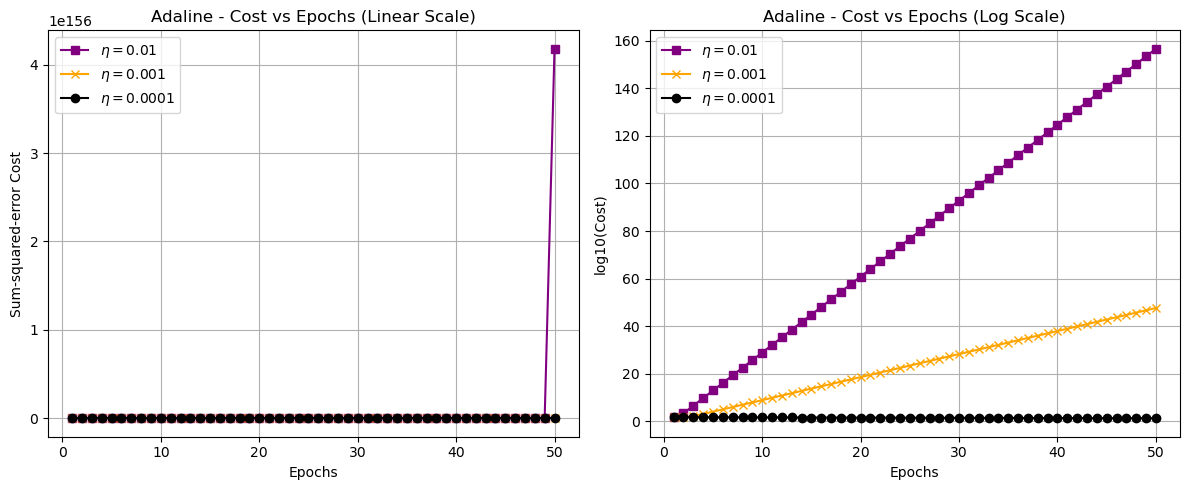

In [103]:
################################

mu = X_iris.mean(axis=0)
sigma = X_iris.std(axis=0)

X_scaled = (X_iris - mu) / sigma # !!!DO NOT CHANGE THE NAME OF THE SCALED FEATURES!!!

adaline_scaled = AdalineGD(eta=0.01, epochs=50).train(X_scaled, y_iris)

# Linear scale plot

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(adaline_01.cost_) + 1), adaline_01.cost_, marker='s', color='purple', label='$\eta = 0.01$')
plt.plot(range(1, len(adaline_001.cost_) + 1), adaline_001.cost_, marker='x', color='orange',label='$\eta = 0.001$')
plt.plot(range(1, len(adaline_0001.cost_) + 1), adaline_0001.cost_, marker='o', color='black', label='$\eta = 0.0001$')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error Cost')
plt.title('Adaline - Cost vs Epochs (Linear Scale)')
plt.legend()
plt.grid(True)

# Log scale plot

plt.subplot(1, 2, 2)
plt.plot(range(1, len(adaline_01.cost_) + 1), np.log10(adaline_01.cost_), marker='s', color='purple',label='$\eta = 0.01$')
plt.plot(range(1, len(adaline_001.cost_) + 1), np.log10(adaline_001.cost_), marker='x',color='orange', label='$\eta = 0.001$')
plt.plot(range(1, len(adaline_0001.cost_) + 1), np.log10(adaline_0001.cost_), marker='o', color='black',label='$\eta = 0.0001$')
plt.xlabel('Epochs')
plt.ylabel('log10(Cost)')
plt.title('Adaline - Cost vs Epochs (Log Scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

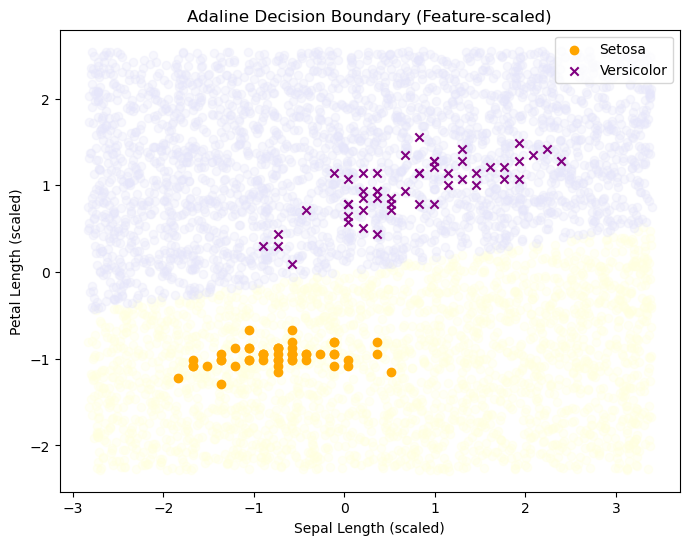

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Generate 5000 random points in the scaled feature space
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

points = np.array([[random.uniform(x_min, x_max), random.uniform(y_min, y_max)] for _ in range(5000)])

# Predict class for each random point
Z = adaline_scaled.predict(points)

# Plot the decision boundary
plt.figure(figsize=(8,6))
plt.scatter(points[Z == -1, 0], points[Z == -1, 1], color='lightyellow', alpha=0.3)
plt.scatter(points[Z == 1, 0], points[Z == 1, 1], color='lavender', alpha=0.3)

# Overlay the original training points
plt.scatter(X_scaled[y_iris == -1, 0], X_scaled[y_iris == -1, 1], color='orange', marker='o', label='Setosa')
plt.scatter(X_scaled[y_iris == 1, 0], X_scaled[y_iris == 1, 1], color='purple', marker='x', label='Versicolor')

plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Petal Length (scaled)')
plt.title('Adaline Decision Boundary (Feature-scaled)')
plt.legend()
plt.show()


# Task 3: scikit learn


In [105]:
# import dependencies
import numpy as np


1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [72]:
# 1. Read the iris dataset using Pandas
import pandas as pd
df = pd.read_csv('iris_data.csv')

print(df.columns)
df


Index(['sepal_length', ' sepa_width', ' petal_length', ' petal_width',
       ' class'],
      dtype='object')


,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:

################################
# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Filtering the data
data = df[(df['class'] == 'Iris-setosa') | (df['class'] == 'Iris-virginica')]

# Features
X = data[['petal_length', 'petal_width']].values

# Encoding labels
y = data['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1).values

4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

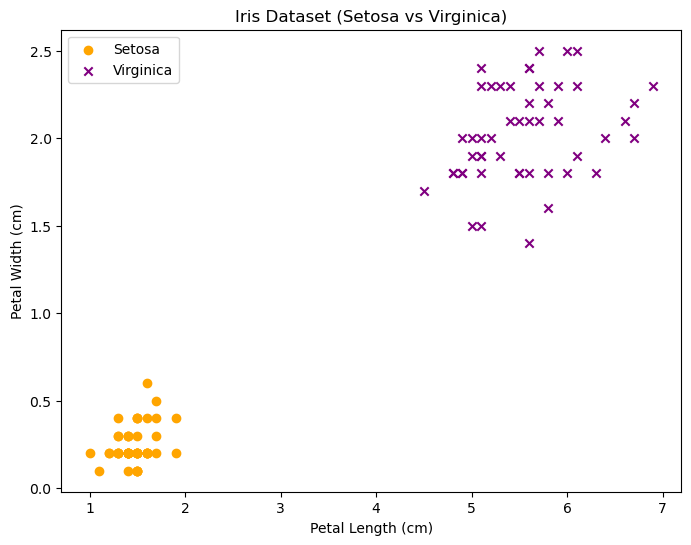

In [82]:
################################
import matplotlib.pyplot as plt

# Boolean values for each class
setosa_mask = y == 0
virginica_mask = y == 1

plt.figure(figsize=(8,6))
plt.scatter(X[setosa_mask, 0], X[setosa_mask, 1], color='orange', marker='o', label='Setosa')
plt.scatter(X[virginica_mask, 0], X[virginica_mask, 1], color='purple', marker='x', label='Virginica')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset (Setosa vs Virginica)')
plt.legend()
plt.show()



5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

Yes it converges very quickly

In [92]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

# Feature scaling for faster convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

perceptron_skl = Perceptron(verbose=1, max_iter=1000, eta0=0.1, random_state=42)# !!!DO NOT CHANGE THE NAME OF THE MODEL!!!
perceptron_skl.fit(X_scaled, y) 





-- Epoch 1
Norm: 0.12, NNZs: 2, Bias: 0.100000, T: 100, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 2, Bias: 0.100000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 2, Bias: 0.100000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.12, NNZs: 2, Bias: 0.100000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.12, NNZs: 2, Bias: 0.100000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.12, NNZs: 2, Bias: 0.100000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds


Perceptron(eta0=0.1, random_state=42, verbose=1)

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

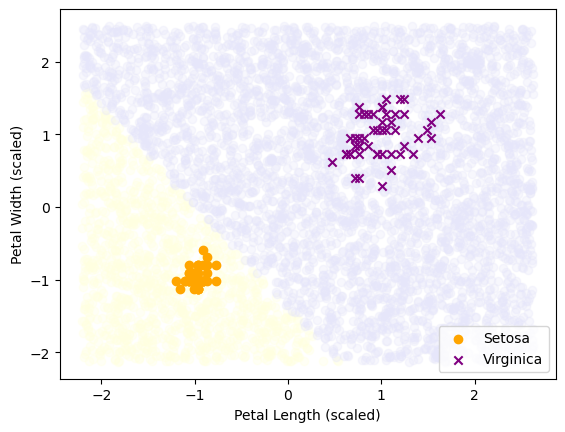

In [91]:
import random

################################
import matplotlib.pyplot as plt
import random
import numpy as np

# 5000 random points in scaled feature space
x_min, x_max = X_scaled[:,0].min()-1, X_scaled[:,0].max()+1
y_min, y_max = X_scaled[:,1].min()-1, X_scaled[:,1].max()+1
points = np.array([[random.uniform(x_min, x_max), random.uniform(y_min, y_max)] for _ in range(5000)])

# Predict and plot
Z = perceptron_skl.predict(points)
plt.scatter(points[Z==0,0], points[Z==0,1], color='lightyellow', alpha=0.3)
plt.scatter(points[Z==1,0], points[Z==1,1], color='lavender', alpha=0.3)
plt.scatter(X_scaled[setosa_mask,0], X_scaled[setosa_mask,1], color='orange', marker='o', label='Setosa')
plt.scatter(X_scaled[virginica_mask,0], X_scaled[virginica_mask,1], color='purple', marker='x', label='Virginica')
plt.xlabel('Petal Length (scaled)'); plt.ylabel('Petal Width (scaled)')
plt.legend(); plt.show()

